<a href="https://colab.research.google.com/github/Mochismo/LearnPython/blob/main/Fourteenth_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Problem 1
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
#X = pd.DataFrame(data.data, columns=(['sepal length (cm)', 'petal length (cm)'], low_memory = True))
X.head()
y = pd.DataFrame(data.target, columns=(['species']))
y.head()
df = pd.concat([X, y], axis=1)
s = df.iloc[:,0] #column sepal length location
f = df.iloc[:,2] #column petal length location
v = df.iloc[:,4] #column species location
df1 = pd.concat([s, f, v], axis=1)
a_3 = df1.loc[df1['species'] != 0]# Eiminate sertosa
a_3

,sepal length (cm),petal length (cm),species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


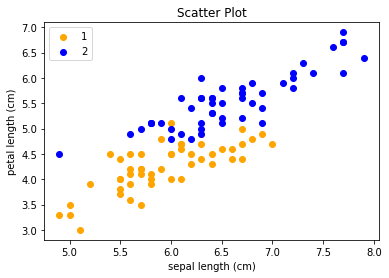

In [42]:
# Problem 2(a)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = ['orange', 'blue']
species = [1,2]
for i in range(2):
  x = a_3[a_3['species']== species[i]]
  plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label= species[i])
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.title('Scatter Plot')
plt.legend() 

{'boxes': [<matplotlib.lines.Line2D at 0x7f559e88a710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f559e8f4710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f559e8e4b90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f559e8e4490>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f559e88aad0>,
  <matplotlib.lines.Line2D at 0x7f559e912c10>]}

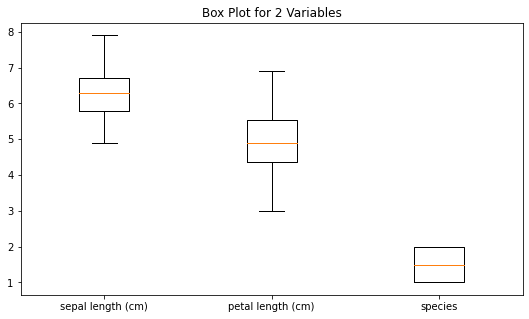

In [43]:
# Problem 2(b)
plt.figure(figsize=(9,5))
plt.title('Box Plot for 2 Variables')
plt.boxplot(a_3.values,labels=['sepal length (cm)', 'petal length (cm)', 'species'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f559e682f90>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f559e541510>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f559e682e90>,
 'cmedians': <matplotlib.collections.LineCollection at 0x7f559e541d10>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f559e541850>}

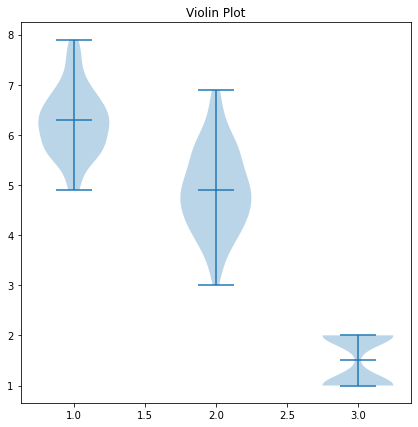

In [44]:
# Problem 2(c)
plt.figure(figsize=(7,7))
plt.title('Violin Plot')
plt.violinplot(a_3.values,showmedians=True)

In [45]:
# Problem 3
from sklearn.model_selection import train_test_split
# train -75%
# test -25%
X = a_3.drop(columns=['species'])
Y = a_3['species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)


In [79]:
# Problem 4
from sklearn.preprocessing import StandardScaler
data = a_3
scaler = StandardScaler()
a_4 = scaler.fit(data)
StandardScaler()
print(scaler.mean_)
a_5 = scaler.transform(data)
a_5

[6.262 4.906 1.5  ]


array([[ 1.11900931, -0.25077906, -1.        ],
       [ 0.20924564, -0.49425387, -1.        ],
       [ 0.96738203, -0.00730424, -1.        ],
       [-1.15539985, -1.10294091, -1.        ],
       [ 0.36087292, -0.37251647, -1.        ],
       [-0.8521453 , -0.49425387, -1.        ],
       [ 0.05761837, -0.25077906, -1.        ],
       [-2.06516352, -1.95510276, -1.        ],
       [ 0.5125002 , -0.37251647, -1.        ],
       [-1.61028169, -1.22467832, -1.        ],
       [-1.91353624, -1.71162795, -1.        ],
       [-0.54889074, -0.8594661 , -1.        ],
       [-0.39726347, -1.10294091, -1.        ],
       [-0.24563619, -0.25077906, -1.        ],
       [-1.00377258, -1.58989054, -1.        ],
       [ 0.66412748, -0.61599128, -1.        ],
       [-1.00377258, -0.49425387, -1.        ],
       [-0.70051802, -0.9812035 , -1.        ],
       [-0.09400891, -0.49425387, -1.        ],
       [-1.00377258, -1.22467832, -1.        ],
       [-0.54889074, -0.12904165, -1.   

In [47]:
# Problem 5
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)


In [48]:
model.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
print(model.predict(X))
preds = model.predict(X)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]


In [82]:
print(model.predict_proba(X))

[[9.99996340e-01 3.65966940e-06]
 [9.99995965e-01 4.03465650e-06]
 [9.99996945e-01 3.05488691e-06]
 [9.99993200e-01 6.80032086e-06]
 [9.99996157e-01 3.84259145e-06]
 [9.99990241e-01 9.75937662e-06]
 [9.99995330e-01 4.67039488e-06]
 [9.99994405e-01 5.59500114e-06]
 [9.99994851e-01 5.14894518e-06]
 [9.99994125e-01 5.87465673e-06]
 [9.99995397e-01 4.60331677e-06]
 [9.99991019e-01 8.98132291e-06]
 [9.99995764e-01 4.23632154e-06]
 [9.99998249e-01 1.75134617e-06]
 [9.99998773e-01 1.22690912e-06]
 [9.99996023e-01 3.97670909e-06]
 [9.99997829e-01 2.17129315e-06]
 [9.99996340e-01 3.65966940e-06]
 [9.99991569e-01 8.43092728e-06]
 [9.99994671e-01 5.32865813e-06]
 [9.99990241e-01 9.75937662e-06]
 [9.99994671e-01 5.32865813e-06]
 [9.99998961e-01 1.03907828e-06]
 [9.99988703e-01 1.12971455e-05]
 [9.99972276e-01 2.77244127e-05]
 [9.99991853e-01 8.14658886e-06]
 [9.99991853e-01 8.14658886e-06]
 [9.99994925e-01 5.07499397e-06]
 [9.99996515e-01 3.48545511e-06]
 [9.99990570e-01 9.43023582e-06]
 [9.999910

In [51]:
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 80.0


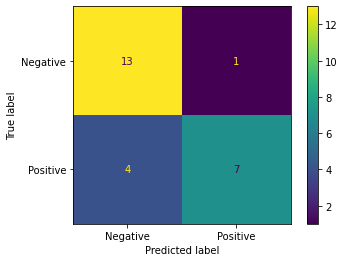

In [52]:
# Problem 6
# print metric to get performance
from sklearn.metrics import precision_score
from sklearn import metrics 
preds = model.predict(x_test)
metrics.plot_confusion_matrix(model, x_test, y_test, display_labels=['Negative', 'Positive'])

In [53]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, preds)
confusion.ravel()

array([13,  1,  4,  7])

In [54]:
# Accuracy Measure
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.8

In [55]:
# Precision Measure
precision_positive = metrics.precision_score(y_test, preds, pos_label=1)
precision_negative = metrics.precision_score(y_test, preds, pos_label=2)
precision_positive, precision_negative

(0.7647058823529411, 0.875)

In [56]:
# Recall Measure
recall_sensitivity = metrics.recall_score(y_test, preds, pos_label=1)
recall_specificity = metrics.recall_score(y_test, preds, pos_label=2)
recall_sensitivity, recall_specificity

(0.9285714285714286, 0.6363636363636364)

In [57]:
# F1-score Measure
f1_positive = metrics.f1_score(y_test, preds, pos_label=1)
f1_negative = metrics.f1_score(y_test, preds, pos_label=2)
f1_positive, f1_negative

(0.8387096774193549, 0.7368421052631579)

(4.800000000000001, 8.0, 2.9, 7.0)

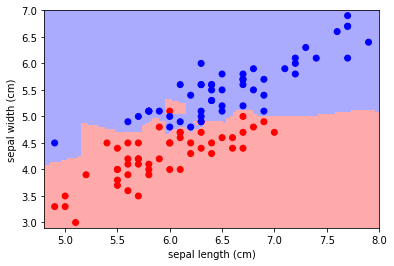

In [58]:
# problem 7
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
iris= load_iris()

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
t = h1.iloc[:, 0]
r = h1.iloc[:, 1]
X =pd.concat([t, r], axis=1)
y = h1.iloc[:, 2]

#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                       # avoid this ugly slicing by using a two-dim dataset
#y = iris.target


knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [59]:
#model training
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

(4.800000000000001, 8.0, 2.9, 7.0)

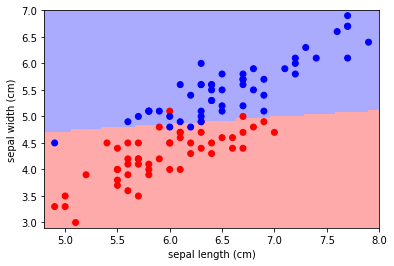

In [74]:
# Problem 8(a)
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [61]:
# print metric to get performance
print("Accuracy:", model.score(x_test, y_test)*100)

Accuracy: 84.0


(4.800000000000001, 8.0, 2.9, 7.0)

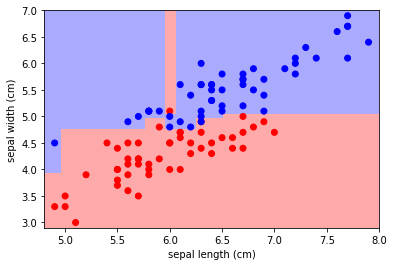

In [73]:
# Problem 8(b)
# decission tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X, y)

x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [63]:
model2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
# print metric to get performance
print("Accuracy:", model2.score(x_test, y_test)*100)

Accuracy: 84.0


(4.800000000000001, 8.0, 2.9, 7.0)

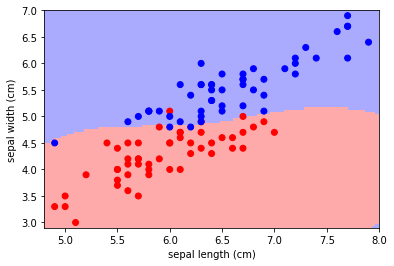

In [72]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

(4.800000000000001, 8.0, 2.9, 7.0)

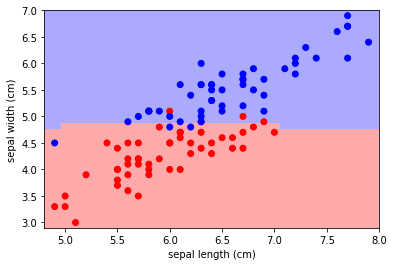

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
h1 = df1.loc[df1['species']!= 0]
t = h1.iloc[:, 0]
r = h1.iloc[:, 1]
X =pd.concat([t, r], axis=1)
y = h1.iloc[:, 2]

clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X, y)
x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [78]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.88      0.64      0.74        11

    accuracy                           0.80        25
   macro avg       0.82      0.78      0.79        25
weighted avg       0.81      0.80      0.79        25



(4.2, 8.0, 0.9, 7.0)

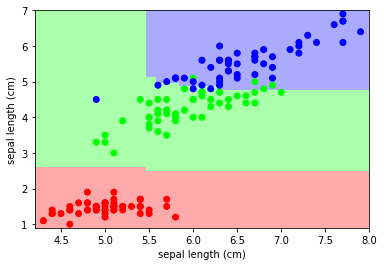

In [81]:
# Problem 10
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
P = pd.DataFrame(iris.data, columns= iris.feature_names)
P.head()
V  = pd.DataFrame(iris.target, columns= (['species']))
V.head()
df = pd.concat([P, V], axis=1)
i = df.iloc[:,0] # Sepal length location
k= df.iloc[:,2]  # petal length location
j= df.iloc[:,4]  # Species location
df1 = pd.concat([i, k,j], axis=1)
X =pd.concat([i, k], axis=1)
y = df1.iloc[:, 2]

clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X, y)
x_min, x_max = X.iloc[:, 0].min() - .1, X.iloc[:, 0].max() + .1
y_min, y_max = X.iloc[:, 1].min() - .1, X.iloc[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
#Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal length (cm)')
plt.axis('tight')